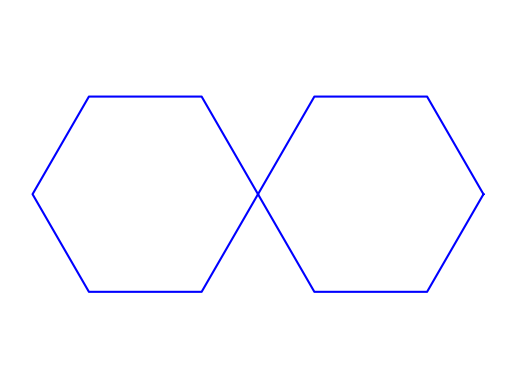

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the hexagon vertices
vertices = np.array([[1, 0], [0.5, np.sqrt(3)/2], [-0.5, np.sqrt(3)/2],
                     [-1, 0], [-0.5, -np.sqrt(3)/2], [0.5, -np.sqrt(3)/2], [1, 0]])

# Plot the hexagon
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.plot(vertices[:, 0]+2, vertices[:, 1], 'b-')
plt.axis('equal')  # Set equal scaling for x and y axes
plt.axis('off')  # Turn off the axis
plt.show()

In [2]:
vertices

array([[ 1.       ,  0.       ],
       [ 0.5      ,  0.8660254],
       [-0.5      ,  0.8660254],
       [-1.       ,  0.       ],
       [-0.5      , -0.8660254],
       [ 0.5      , -0.8660254],
       [ 1.       ,  0.       ]])

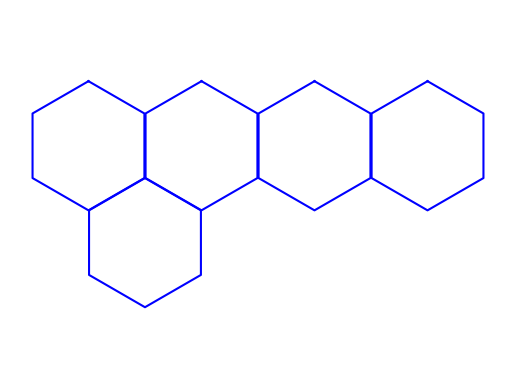

In [3]:
# Define the coordinates of the hexagon vertices
vertices = np.array([[0, 1], [np.sqrt(3)/2, 0.5], [np.sqrt(3)/2, -0.5],
                     [0, -1], [-np.sqrt(3)/2, -0.5], [-np.sqrt(3)/2, 0.5], [0, 1]])

# Plot the hexagon
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.plot(vertices[:, 0]+1.75, vertices[:, 1], 'b-')
plt.plot(vertices[:, 0]+1.75*2, vertices[:, 1], 'b-')
plt.plot(vertices[:, 0]+1.75*3, vertices[:, 1], 'b-')

plt.plot(vertices[:, 0]+1.75/2, vertices[:, 1]-1.5, 'b-')
# plt.plot(vertices[:, 0]+1.75, vertices[:, 1], 'b-')
# plt.plot(vertices[:, 0]+1.75*2, vertices[:, 1], 'b-')
# plt.plot(vertices[:, 0]+1.75*3, vertices[:, 1], 'b-')
plt.axis('equal')  # Set equal scaling for x and y axes
plt.axis('off')  # Turn off the axis
plt.show()

In [4]:
from hex_world import HexWorld

GRID = [
    [
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
    ],
    [
        "5",
        "0",
        "0",
        "X",
        "0",
        "0",
        "X",
        "X",
        "0",
        "0",
    ],
    [
        "0",
        "0",
        "-10",
        "0",
        "X",
        "0",
        "0",
        "0",
        "X",
        "10",
    ],
]

hw = HexWorld(grid=GRID)

In [5]:
hw

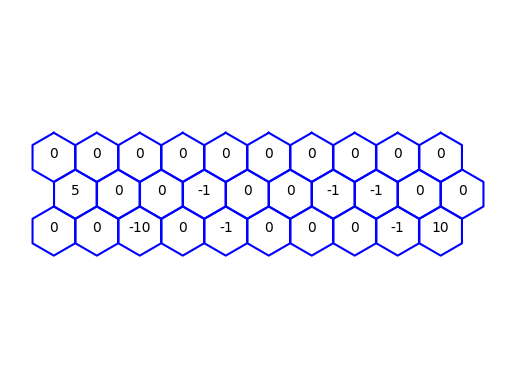

In [6]:
hw.plt_graph()

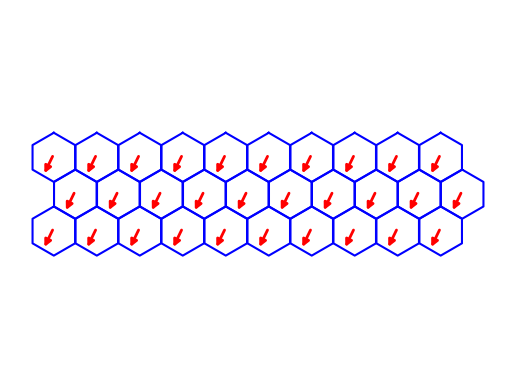

In [7]:
hw.plt_graph(show_score=False, show_policy=True)